In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
import streamlit as st

# from statsmodels.graphics.tsaplots import plot_acf, plot_pac
# import seaborn as sns

In [2]:
daily_load_shedding_df = pd.read_csv('../../data/cleaned data/dayly_load_shedding_schedule_chennai_2014_2022.csv')
daily_load_shedding_df.shape

(479, 9)

In [3]:
demand_supply_monthly_df = pd.read_csv('../../data/cleaned data/demand_supply_monthly.csv')
demand_supply_monthly_df.shape

(122, 17)

In [4]:
demand_supply_yearly_df= pd.read_csv('../../data/cleaned data/demand_supply_yearly.csv')
demand_supply_yearly_df.shape

(11, 12)

In [5]:
electricity_consumption_df = pd.read_csv('../../data/cleaned data/electricity_consumption_consolidated.csv')
electricity_consumption_df.shape

(64, 5)

In [6]:
electricity_generation_df = pd.read_csv('../../data/cleaned data/electricity_generation_consolidated_supply_only.csv')
electricity_generation_df.shape

(507, 4)

## daily_load_shedding_df

In [7]:
daily_load_shedding_df.columns

Index(['PO_day', 'PO_date', 'PO_start_time', 'PO_end_time', 'PO_posting_date',
       'PO_posting_time', 'PO_duration(Hrs)', 'PO_start_time_short',
       'PO_end_time_short'],
      dtype='object')

In [8]:
daily_load_shedding_df.tail()

,PO_day,PO_date,PO_start_time,PO_end_time,PO_posting_date,PO_posting_time,PO_duration(Hrs),PO_start_time_short,PO_end_time_short
474,Saturday,2014-05-17 00:00:00,1900-01-01 09:00:00,1900-01-01 17:00:00,2014-05-16 00:00:00,2:43:16 PM,8.0,09:00:00,17:00:00
475,Sunday,2014-10-05 00:00:00,1900-01-01 09:00:00,1900-01-01 14:00:00,2014-05-09 00:00:00,4:13:21 PM,5.0,09:00:00,14:00:00
476,Friday,2014-09-05 00:00:00,1900-01-01 09:00:00,1900-01-01 14:00:00,2014-05-08 00:00:00,3:25:55 PM,5.0,09:00:00,14:00:00
477,Tuesday,2014-08-05 00:00:00,1900-01-01 09:00:00,1900-01-01 14:00:00,2014-05-07 00:00:00,12:09:01 PM,5.0,09:00:00,14:00:00
478,Saturday,2014-07-05 00:00:00,1900-01-01 09:00:00,1900-01-01 14:00:00,2014-05-06 00:00:00,11:18:47 AM,5.0,09:00:00,14:00:00


In [9]:
demand_supply_monthly_df.head()

,Requirement(MU/DAY),Energy_met(MU/DAY),Surplus(+)/Deficit(-)(MU/DAY),Requirement(MU),Energy_met(MU),Surplus(+)/Deficit(-)(MU),%Shortage(MU),Requirement(MW),Peak_Demand_Met5(MW),Surplus(+)/Deficit(-)(MW),%Shortage(MW),name_report,year,month,date_published,month_published,year_published
0,354.0,354.0,-0.9,10632.0,10605.0,-26.0,-0.2,17646.0,17563.0,-83.0,-0.5,Monthly_Report_Apr_2022,2022,4,2022-05-23,5,2022
1,337.0,337.0,0.0,10459.0,10458.0,-1.0,0.0,16906.0,16906.0,0.0,0.0,Monthly_Report_May_2022,2022,5,2022-06-23,6,2022
2,344.0,343.0,-0.3,10657.0,10648.0,-9.0,-0.1,17196.0,17196.0,0.0,0.0,Monthly_Report_Mar_2022,2022,3,2022-04-25,4,2022
3,286.0,286.0,0.0,8873.0,8873.0,1.0,0.0,15290.0,15290.0,0.0,0.0,Monthly_Report_Jan_2022,2022,1,2022-02-23,2,2022
4,245.0,245.0,0.0,7362.0,7360.0,-1.0,0.0,13501.0,13480.0,-21.0,-0.2,Monthly_Report_Nov_2021,2021,11,2021-12-23,12,2021


In [10]:
electricity_consumption_df[electricity_consumption_df.Category=='Domestic']

,Category Id,Category,Consumption (M.U),Year,Consumers
2,3,Domestic,13709,2010,15565047
9,3,Domestic,16312,2011,16318288
16,3,Domestic,16249,2012,16897339
23,3,Domestic,"18,231",2013,17697908
30,3,Domestic,20201,2014,18402768
36,3,Domestic,21990,2015,19988000
42,3,Domestic,23489,2016,20131000
48,3,Domestic,24530,2017,20696000
53,3,Domestic,25815,2018,21303347
59,3,Domestic,26996,2019,21875000


In [11]:
electricity_consumption_df.Category.unique()

array(['Industries (including Traction)', 'Agriculture', 'Domestic',
       'Commercial', 'Public Lighting and Water works',
       'Sales of Licensees,Sales to other States', 'Miscellaneous',
       'Miscellaneous ', 'Public Lighting and Water Works'], dtype=object)

In [12]:
electricity_generation_df.head()

,Type,Name,Net Generation(M.U),Year
0,Gas,Basin Bridge,79.16,2010
1,Gas,Kovil Kalappal,487.20,2010
2,Gas,Vazhuthur I & II,1008.89,2010
3,Gas,Kutralam,602.78,2010
4,Gas,Wind Mill,11.09,2010


In [13]:
demand_supply_yearly_df.shape

(11, 12)

In [14]:
demand_supply_monthly_df

,Requirement(MU/DAY),Energy_met(MU/DAY),Surplus(+)/Deficit(-)(MU/DAY),Requirement(MU),Energy_met(MU),Surplus(+)/Deficit(-)(MU),%Shortage(MU),Requirement(MW),Peak_Demand_Met5(MW),Surplus(+)/Deficit(-)(MW),%Shortage(MW),name_report,year,month,date_published,month_published,year_published
0,354.0,354.0,-0.9,10632.0,10605.0,-26.0,-0.2,17646.0,17563.0,-83.0,-0.5,Monthly_Report_Apr_2022,2022,4,2022-05-23,5,2022
1,337.0,337.0,0.0,10459.0,10458.0,-1.0,0.0,16906.0,16906.0,0.0,0.0,Monthly_Report_May_2022,2022,5,2022-06-23,6,2022
2,344.0,343.0,-0.3,10657.0,10648.0,-9.0,-0.1,17196.0,17196.0,0.0,0.0,Monthly_Report_Mar_2022,2022,3,2022-04-25,4,2022
3,286.0,286.0,0.0,8873.0,8873.0,1.0,0.0,15290.0,15290.0,0.0,0.0,Monthly_Report_Jan_2022,2022,1,2022-02-23,2,2022
4,245.0,245.0,0.0,7362.0,7360.0,-1.0,0.0,13501.0,13480.0,-21.0,-0.2,Monthly_Report_Nov_2021,2021,11,2021-12-23,12,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,284.0,284.0,-0.1,8807.0,8803.0,-4.0,0.0,14971.0,14946.0,-25.0,-0.2,Monthly Report December 2018,2018,12,2019-01-23,1,2019
118,285.0,284.8,-0.3,8835.9,8828.0,-7.9,-0.1,14971.0,14946.0,-25.0,-0.2,Monthly Report October 2018,2018,10,2018-11-22,11,2018
119,300.9,300.7,-0.2,9326.8,9320.9,-5.8,-0.1,15025.0,14984.0,-41.0,-0.3,Monthly Report August 2018,2018,8,2018-09-23,9,2018
120,315.7,315.5,-0.2,9471.3,9464.3,-7.0,-0.1,15191.0,15183.0,-8.0,-0.1,Monthly Report June 2018,2018,6,2018-07-23,7,2018


In [15]:
demand_supply_monthly_df.columns

Index(['Requirement(MU/DAY)', 'Energy_met(MU/DAY)',
       'Surplus(+)/Deficit(-)(MU/DAY)', 'Requirement(MU)', 'Energy_met(MU)',
       'Surplus(+)/Deficit(-)(MU)', '%Shortage(MU)', 'Requirement(MW)',
       'Peak_Demand_Met5(MW)', 'Surplus(+)/Deficit(-)(MW)', '%Shortage(MW)',
       'name_report', 'year', 'month', 'date_published', 'month_published',
       'year_published'],
      dtype='object')

In [16]:
demand_supply_monthly_df[['month','year']].groupby(['year']).count()

,month
year,
2012,9
2013,12
2014,12
2015,12
2016,12
2017,12
2018,12
2019,12
2020,12


# Questions to be addressed
### Build a model to predict the following based on the month-wise energy consumption pattern in Tamil Nadu, India data collected  
#### 1) Predict the Requirements (MU/Day)
#### 2) Requirement(MU)
#### 3) Requirement(MW)
#### 4) Predict the Peak_Demand_Met5(MW) for future months


MU means Million units of electricity. One unit of electricity is one Kilowatt per hour. One Kilowatt are a thousand Watts. 

MW - Megawatts are basic to understanding electricity planning concepts. 
Watts (W) are the yardstick for measuring power. A one hundred watt light bulb, for example, is rated to consume one hundred watts of power when turned on. If such a light bulb were on for four hours it would consume a total of 400 watt-hours (Wh) of energy. Watts, therefore, measure instantaneous power while watt hours measure the total amount of energy consumed over a period of time.

A megawatt (MW) is one million watts and a kilowatt (kW) is one thousand watts. Both terms are commonly used in the power business when describing generation or load consumption. For instance, a 100 MW rated wind farm is capable of producing 100 MW during peak winds, but will produce much less than its rated amount when winds are light. 

The ratio of a power plant’s average production to its rated capability is known as capacity factor. Load factor generally, on the other hand, is calculated by dividing the average load by the peak load over a certain period of time. If the residential load at a utility averaged 5,000 MW over the course of a year and the peak load was 10,000 MW, then the residential customers would be said to have a load factor of 50
percent (5,000 MW average divided by 10,000 MW peak).

In [17]:
df_temp = demand_supply_monthly_df[['Requirement(MU/DAY)', 'Energy_met(MU/DAY)', 'Requirement(MU)', 
                                    'Energy_met(MU)','Requirement(MW)', 'Peak_Demand_Met5(MW)','year', 'month']]

df_temp.shape

(122, 8)

In [18]:
df_temp.head()

,Requirement(MU/DAY),Energy_met(MU/DAY),Requirement(MU),Energy_met(MU),Requirement(MW),Peak_Demand_Met5(MW),year,month
0,354.0,354.0,10632.0,10605.0,17646.0,17563.0,2022,4
1,337.0,337.0,10459.0,10458.0,16906.0,16906.0,2022,5
2,344.0,343.0,10657.0,10648.0,17196.0,17196.0,2022,3
3,286.0,286.0,8873.0,8873.0,15290.0,15290.0,2022,1
4,245.0,245.0,7362.0,7360.0,13501.0,13480.0,2021,11


In [19]:

df_temp['date'] = pd.to_datetime(df_temp['year'].apply(str)+'-'+df_temp['month'].apply(str)+'-'+str(1), format='%Y-%m-%d')

/tmp/ipykernel_7719/3883615438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['date'] = pd.to_datetime(df_temp['year'].apply(str)+'-'+df_temp['month'].apply(str)+'-'+str(1), format='%Y-%m-%d')


In [20]:
df_temp.sort_values('date', inplace=True)


/tmp/ipykernel_7719/4199139029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.sort_values('date', inplace=True)


In [21]:
df_temp.tail()

,Requirement(MU/DAY),Energy_met(MU/DAY),Requirement(MU),Energy_met(MU),Requirement(MW),Peak_Demand_Met5(MW),year,month,date
3,286.0,286.0,8873.0,8873.0,15290.0,15290.0,2022,1,2022-01-01
8,322.0,322.0,9028.0,9028.0,16262.0,16262.0,2022,2,2022-02-01
2,344.0,343.0,10657.0,10648.0,17196.0,17196.0,2022,3,2022-03-01
0,354.0,354.0,10632.0,10605.0,17646.0,17563.0,2022,4,2022-04-01
1,337.0,337.0,10459.0,10458.0,16906.0,16906.0,2022,5,2022-05-01


In [22]:
# To find the correlation among
# the columns using pearson method
df_temp[['Requirement(MU/DAY)', 'Energy_met(MU/DAY)', 'Requirement(MU)', 'Energy_met(MU)','Requirement(MW)', 
         'Peak_Demand_Met5(MW)']].corr(method ='pearson')

,Requirement(MU/DAY),Energy_met(MU/DAY),Requirement(MU),Energy_met(MU),Requirement(MW),Peak_Demand_Met5(MW)
Requirement(MU/DAY),1.000000,0.936236,0.962122,0.910293,0.826244,0.800857
Energy_met(MU/DAY),0.936236,1.000000,0.906506,0.978842,0.877694,0.917977
Requirement(MU),0.962122,0.906506,1.000000,0.937061,0.818923,0.786638
Energy_met(MU),0.910293,0.978842,0.937061,1.000000,0.872410,0.907465
Requirement(MW),0.826244,0.877694,0.818923,0.872410,1.000000,0.951951
Peak_Demand_Met5(MW),0.800857,0.917977,0.786638,0.907465,0.951951,1.000000


In [23]:



corr = df_temp[['Requirement(MU/DAY)', 'Energy_met(MU/DAY)', 'Requirement(MU)', 'Energy_met(MU)',
                     'Requirement(MW)','Peak_Demand_Met5(MW)']].corr()

corr.style.background_gradient(cmap='coolwarm').set_precision(2)

# plt.matshow(corr)
# plt.show()

/tmp/ipykernel_7719/3671122157.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,Requirement(MU/DAY),Energy_met(MU/DAY),Requirement(MU),Energy_met(MU),Requirement(MW),Peak_Demand_Met5(MW)
Requirement(MU/DAY),1.00,0.94,0.96,0.91,0.83,0.80
Energy_met(MU/DAY),0.94,1.00,0.91,0.98,0.88,0.92
Requirement(MU),0.96,0.91,1.00,0.94,0.82,0.79
Energy_met(MU),0.91,0.98,0.94,1.00,0.87,0.91
Requirement(MW),0.83,0.88,0.82,0.87,1.00,0.95
Peak_Demand_Met5(MW),0.80,0.92,0.79,0.91,0.95,1.00


In [24]:


# plt.figure(figsize=(15, 10))
# sns.heatmap(corr, annot=True)


In [25]:
df_temp1 = df_temp[['date','Peak_Demand_Met5(MW)']]

df_temp1.set_index('date', inplace=True)

df_temp1.head()

,Peak_Demand_Met5(MW)
date,
2012-04-01,10078.0
2012-05-01,10491.0
2012-06-01,11283.0
2012-07-01,11105.0
2012-08-01,10751.0


In [26]:
df_temp1.sort_index()

,Peak_Demand_Met5(MW)
date,
2012-04-01,10078.0
2012-05-01,10491.0
2012-06-01,11283.0
2012-07-01,11105.0
2012-08-01,10751.0
...,...
2022-01-01,15290.0
2022-02-01,16262.0
2022-03-01,17196.0


In [27]:
df = df_temp1
#df_ts['t'] = [x for x in range(10)]
df

,Peak_Demand_Met5(MW)
date,
2012-04-01,10078.0
2012-05-01,10491.0
2012-06-01,11283.0
2012-07-01,11105.0
2012-08-01,10751.0
...,...
2022-01-01,15290.0
2022-02-01,16262.0
2022-03-01,17196.0


### Plot Peak_Demand_Met5


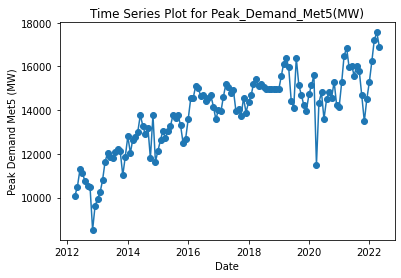

In [28]:

plt.plot(df["Peak_Demand_Met5(MW)"], marker='o')

# Labelling 

plt.xlabel("Date")
plt.ylabel("Peak Demand Met5 (MW)")
plt.title("Time Series Plot for Peak_Demand_Met5(MW)")

# Display

plt.show()

The graph shows that the demand has not been stationary. Inorder to model this data, we will have to first make this series as a stationary series. Then only, we would be in a postion to forecast next month's/future demand.

Different types of Stationary Time Series

a) Stationary Process: A process that generates a stationary series of observations.


b) Stationary Model: A model that describes a stationary series of observations.


c) Trend Stationary: A time series that does not exhibit a trend.


d) Seasonal Stationary: A time series that does not exhibit seasonality.


e) Strictly Stationary: A mathematical definition of a stationary process, specifically that the joint f) distribution of observations is invariant to time shift.

In [29]:
# First-order difference
df['Peak_Demand_Met5_MW_diff1'] = df['Peak_Demand_Met5(MW)'].diff(periods=1)
df = df.dropna()

/tmp/ipykernel_7719/51868633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Peak_Demand_Met5_MW_diff1'] = df['Peak_Demand_Met5(MW)'].diff(periods=1)


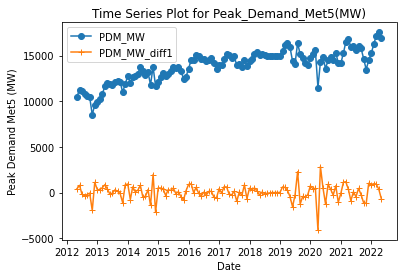

In [30]:

plt.plot(df["Peak_Demand_Met5(MW)"], marker='o',  label='PDM_MW')
plt.plot(df["Peak_Demand_Met5_MW_diff1"], marker='+', label='PDM_MW_diff1')

# Labelling 

plt.xlabel("Date")
plt.ylabel("Peak Demand Met5 (MW)")
plt.title("Time Series Plot for Peak_Demand_Met5(MW)")
plt.legend();

# Display

plt.show()

In [31]:
#
# Check for stationarity of the time-series data
# We will look for p-value. In case, p-value is less than 0.05, the time series
# data can said to have stationarity
#
from statsmodels.tsa.stattools import adfuller
#
# Run the test
#
df_stationarityTest = adfuller(df['Peak_Demand_Met5(MW)'], autolag='AIC')
#
# Check the value of p-value
#
print("P-value: ", df_stationarityTest[1])
#
# Next step is to find the order of AR model to be trained
# for this, we will plot partial autocorrelation plot to assess
# the direct effect of past data on future data
#
# from statsmodels.graphics.tsaplots import plot_pacf
# pacf = plot_pacf(df['Consumption'], lags=25)


P-value:  0.16621387265879567


In [32]:

# Calculate autocorrelation
acf_values = acf(df['Peak_Demand_Met5_MW_diff1'])
print(np.round(acf_values,2))

pacf_values = pacf(df['Peak_Demand_Met5_MW_diff1'])
print(np.round(pacf_values,2))


[ 1.   -0.26 -0.1  -0.   -0.08 -0.01  0.04 -0.1  -0.12  0.05  0.17 -0.07
 -0.    0.14 -0.08  0.09 -0.13 -0.09  0.04  0.1  -0.09]
[ 1.   -0.26 -0.18 -0.09 -0.14 -0.1  -0.03 -0.15 -0.27 -0.17  0.06 -0.08
 -0.09  0.13  0.02  0.11 -0.13 -0.12 -0.02  0.09 -0.09]


In [33]:
type(pd.Series(pacf_values))

pandas.core.series.Series

<AxesSubplot:>

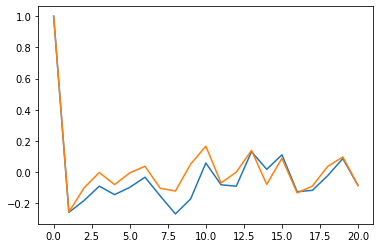

In [34]:
pd.Series(pacf_values).plot()
pd.Series(acf_values).plot()


Ref:  https://towardsdatascience.com/time-series-from-scratch-autocorrelation-and-partial-autocorrelation-explained-1dd641e3076f
        
        
        
How to interpret ACF and PACF plots
Time series models you’ll soon learn about, such as Auto Regression (AR), Moving Averages (MA), or their combinations (ARMA), require you to specify one or more parameters. These can be obtained by looking at ACF and PACF plots.

In a nutshell:

If the ACF plot declines gradually and the PACF drops instantly, use Auto Regressive model.

If the ACF plot drops instantly and the PACF declines gradually, use Moving Average model.

If both ACF and PACF decline gradually, combine Auto Regressive and Moving Average models (ARMA).

If both ACF and PACF drop instantly (no significant lags), it’s likely you won’t be able to model the time series.

In [35]:
# Plot autocorrelation
# plot_acf(df['Peak_Demand_Met5_MW_diff1'], lags=30);

In [36]:
from statsmodels.tsa.ar_model import AutoReg


In [37]:
#
# Create training and test data
#
train_data = df['Peak_Demand_Met5(MW)'][:len(df)-20]
test_data = df['Peak_Demand_Met5(MW)'][len(df)-20:]
#
# Instantiate and fit the AR model with training data
#
ar_model = AutoReg(train_data, lags=1).fit()
#
# Print Summary
#
print(ar_model.summary())

                             AutoReg Model Results                              
Dep. Variable:     Peak_Demand_Met5(MW)   No. Observations:                  101
Model:                       AutoReg(1)   Log Likelihood                -811.125
Method:                 Conditional MLE   S.D. of innovations            806.181
Date:                  Wed, 27 Jul 2022   AIC                           1628.249
Time:                          10:44:00   BIC                           1636.065
Sample:                      06-01-2012   HQIC                          1631.412
                           - 09-01-2020                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2015.3896    669.916      3.008      0.003     702.379    3328.401
Peak_Demand_Met5(MW).L1     0.8542      0.049     17.372      0.000       0.

/home/abhay.bhadani/Omdena/venvpy39/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [38]:
df.head()

,Peak_Demand_Met5(MW),Peak_Demand_Met5_MW_diff1
date,,
2012-05-01,10491.0,413.0
2012-06-01,11283.0,792.0
2012-07-01,11105.0,-178.0
2012-08-01,10751.0,-354.0
2012-09-01,10534.0,-217.0


In [39]:
type(df['Peak_Demand_Met5(MW)'])

pandas.core.series.Series

<AxesSubplot:xlabel='date'>

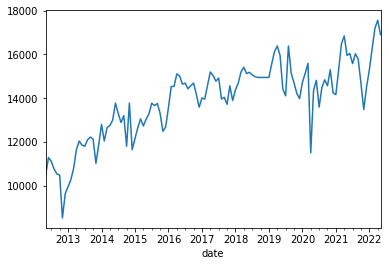

In [40]:
df['Peak_Demand_Met5(MW)'].plot()

In [41]:
test_data

date
2020-10-01    14564.0
2020-11-01    15298.0
2020-12-01    14238.0
2021-01-01    14163.0
2021-02-01    15298.0
2021-03-01    16481.0
2021-04-01    16846.0
2021-05-01    15957.0
2021-06-01    16040.0
2021-07-01    15579.0
2021-08-01    16029.0
2021-09-01    15786.0
2021-10-01    14675.0
2021-11-01    13480.0
2021-12-01    14501.0
2022-01-01    15290.0
2022-02-01    16262.0
2022-03-01    17196.0
2022-04-01    17563.0
2022-05-01    16906.0
Name: Peak_Demand_Met5(MW), dtype: float64

/home/abhay.bhadani/Omdena/venvpy39/lib/python3.9/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


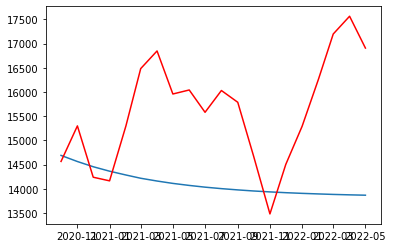

In [42]:
#
# Make the predictions
#
pred = ar_model.predict(start=len(train_data), end=(len(df)-1), dynamic=False)
#
# Plot the prediction vs test data
#
from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test_data, color='red')

The more lags you use, the lower the correlation will be. The easiest way to make time series stationary is by calculating the first-order difference. 


In [43]:
df.columns

Index(['Peak_Demand_Met5(MW)', 'Peak_Demand_Met5_MW_diff1'], dtype='object')

In [44]:
### n_in : Number of Lag Observation
### n_out : Number of Observation as Output
n_in=5
n_out=1
dropnan=False
n_vars = 1 if type(df) is list else df.shape[1]
n_vars = 1
df = df[['Peak_Demand_Met5(MW)']]

In [45]:
cols, names = list(), list()
# input sequence (t-n, ... t-1)
for i in range(n_in, 0, -1):
    cols.append(df.shift(i))
    names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    
# forecast sequence (t, t+1, ... t+n)
for i in range(0, n_out):
    cols.append(df.shift(-i))
    if i == 0:
        names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
    else:
        names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
        
        
        
# put it all together
agg = pd.concat(cols, axis=1)
agg.columns = names
# drop rows with NaN values
if dropnan:
    agg.dropna(inplace=True)

In [46]:
agg.head(7)

,var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
date,,,,,,
2012-05-01,NaN,NaN,NaN,NaN,NaN,10491.0
2012-06-01,NaN,NaN,NaN,NaN,10491.0,11283.0
2012-07-01,NaN,NaN,NaN,10491.0,11283.0,11105.0
2012-08-01,NaN,NaN,10491.0,11283.0,11105.0,10751.0
2012-09-01,NaN,10491.0,11283.0,11105.0,10751.0,10534.0
2012-10-01,10491.0,11283.0,11105.0,10751.0,10534.0,10477.0
2012-11-01,11283.0,11105.0,10751.0,10534.0,10477.0,8518.0


## LSTM Implementation 

In [47]:
# univariate lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

2022-07-27 10:44:54.003587: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/mpi/lib:
2022-07-27 10:44:54.003642: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [48]:
n_steps = 5
n_features=1
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

2022-07-27 10:45:36.014333: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/mpi/lib:
2022-07-27 10:45:36.014358: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-27 10:45:36.014377: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (lap0002592): /proc/driver/nvidia/version does not exist
2022-07-27 10:45:36.015262: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [49]:
sequence = agg[['var1(t)']].to_numpy()
type(sequence), sequence.shape, sequence.shape[0], sequence.shape[1]

(numpy.ndarray, (121, 1), 121, 1)

In [50]:
X, y = list(), list()
for i in range(len(sequence)):
    # find the end of this pattern
    end_ix = i + n_steps
    # check if we are beyond the sequence
    if end_ix > len(sequence)-1:
        break
    # gather input and output parts of the pattern
    seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
    X.append(seq_x)
    y.append(seq_y)

X = array(X)
y = array(y)
# reshape from [samples, timesteps] into [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], n_features))
print(X.shape, y.shape)
# fit model
model.fit(X, y, epochs=1000, verbose=0)



(116, 5, 1) (116, 1)


In [59]:
agg['var1(t)'].to_numpy()[115:120]

array([14501., 15290., 16262., 17196., 17563.])

In [63]:
#x_input=agg['var1(t)'].to_numpy()[115:120]
x_input = np.asarray([14501., 15290., 16262., 17196., 17563.])
y_org = agg[['var1(t)']].to_numpy()[120]
x_input

array([14501., 15290., 16262., 17196., 17563.])

In [64]:
x_input = x_input.reshape(1, n_steps, n_features)
print(x_input)
yhat = model.predict(x_input, verbose=0)
print(yhat,y_org)

[[[14501.]
  [15290.]
  [16262.]
  [17196.]
  [17563.]]]
[[16437.074]] [16906.]


In [53]:
import pickle

# save the model to disk
filename = 'finalized_lstm_model.sav'
pickle.dump(model, open(filename, 'wb'))

# some time later...


2022-07-27 10:45:52.844 INFO    tensorflow: Assets written to: ram://97bb4c63-2d10-4961-92eb-dea0c1509c24/assets


In [54]:
from sklearn.metrics import mean_squared_error
from math import sqrt

scores=list()
mse = mean_squared_error(y_org, yhat)
# calculate rmse
rmse = sqrt(mse)
# store
scores.append(rmse)
print(mse, rmse, scores)

219891.38832092285 468.92578125 [468.92578125]


2022-07-27 10:45:55.894 
  command:

    streamlit run /home/abhay.bhadani/Omdena/venvpy39/lib/python3.9/site-packages/ipykernel_launcher.py [ARGUMENTS]
